In [1]:
from vectorhash import build_vectorhash_architecture
import torch
import torchvision
from torchvision import transforms
from vectorhash_functions import space_filling_curve
import matplotlib.pyplot as plt
from data_utils import prepare_data

transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Lambda(lambda x: x.flatten())]
)

mnist = torchvision.datasets.MNIST(
    root="data", train=True, download=True, transform=transform
)

vhash = build_vectorhash_architecture(
    shapes=[(3,3), (5,5), (7,7)],
    N_h=1000,
    input_size=784,
    initalization_method="by_scaling",
    W_gh_var=1,
    percent_nonzero_relu=0.5,
    sparse_initialization=0.1,
    T=1e-6,
    device=torch.device("cpu"),
    hippocampal_sensory_layer_type="iterative_pseudoinverse",
    hidden_layer_factor=1,
    stationary=True,
    epsilon_hs=0.1,
    epsilon_sh=0.1,
)

num_imgs = 2000

/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


In [2]:
mnist_data, noisy_mnist_data =prepare_data(mnist, num_imgs=num_imgs, preprocess_sensory=True, noise_level="none", across_dataset=False)

# velocities = space_filling_curve([[3,3], [5,5], [7,7]])

# vhash.learn_path(observations=mnist_data, velocities=velocities[:num_imgs])
# recalled_imgs = vhash.recall(noisy_mnist_data)
# recalled_imgs = recalled_imgs.reshape(-1, 1, 28, 28)

# for i in range(num_imgs):
#     recalled_img = recalled_imgs[i].squeeze().detach().numpy()
#     recalled_img = recalled_img.reshape(28, 28)
#     plt.imshow(recalled_img, cmap="gray")
#     plt.show()
    

/Users/Ile-Maurice/Library/Python/3.10/lib/python/site-packages/torchvision/datasets/mnist.py:76: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


In [3]:
from test_utils import dynamics_patts, capacity_test
import numpy as np


relu=[False,True]


err_h_l2_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)
err_s_l2_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)
err_s_l1_results = np.zeros(
    (
        len(relu),
        len([100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700])
    ),
)


Npatts_list = [100, 400, 600, 800, 900, 1000, 1100, 1200, 1300, 1400, 1700]
for i, relus in enumerate(relu):
    errs2, errh, errs = capacity_test(
        sbook=mnist_data,
        Npatts_list=Npatts_list,
        nruns=1,
        device=torch.device("cpu"),
        sign_output=False,
        shapes=[(3,3), (5,5), (7,7)],
        N_h=1000,
        input_size=784,
        initalization_method="by_scaling",
        W_gh_var=1,
        percent_nonzero_relu=0.7,
        sparse_initialization=0.1,
        T=1e-6,
        hippocampal_sensory_layer_type="iterative_pseudoinverse",
        hidden_layer_factor=1,
        stationary=True,
        epsilon_hs=0.1,
        epsilon_sh=0.1,
        relu=relus,
    )
    err_h_l2_results[i] = errh.reshape(-1)
    err_s_l2_results[i] = errs2.reshape(-1)
    err_s_l1_results[i] = errs.reshape(-1)

by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


  0%|          | 0/11 [00:00<?, ?it/s]/Users/Ile-Maurice/Desktop/rl-research-main/rl-research/vectorhash/hippocampal_sensory_layers.py:104: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3729.)
  1 + input.T @ self.inhibition_matrix_hs @ input
  9%|▉         | 1/11 [00:00<00:06,  1.59it/s]

tensor([[1.0000e+00, 0.0000e+00, 1.4013e-44,  ..., 7.2176e-08, 1.0950e-08,
         7.8659e-09],
        [4.8065e-43, 1.0000e+00, 2.8026e-44,  ..., 4.5774e-09, 8.5143e-10,
         1.2383e-09],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 6.3702e-10, 1.7251e-10,
         7.0126e-12],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.1274e-09, 1.2243e-09,
         1.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 2.4101e-09, 6.5261e-10,
         1.6606e-09],
        [1.0000e+00, 0.0000e+00, 4.2039e-45,  ..., 4.9143e-09, 9.7933e-09,
         5.2343e-09]])


 18%|█▊        | 2/11 [00:03<00:18,  2.03s/it]

tensor([[1.0000e+00, 0.0000e+00, 1.4013e-44,  ..., 7.2410e-08, 1.0986e-08,
         7.8911e-09],
        [4.8345e-43, 1.0000e+00, 2.8026e-44,  ..., 4.5840e-09, 8.5084e-10,
         1.2407e-09],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 6.3710e-10, 1.7252e-10,
         7.0196e-12],
        ...,
        [0.0000e+00, 1.0000e+00, 0.0000e+00,  ..., 1.1560e-09, 3.9503e-10,
         1.6019e-10],
        [7.9874e-44, 1.3677e-42, 1.0000e+00,  ..., 2.6195e-09, 1.2063e-08,
         2.5014e-09],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2066e-10, 2.5060e-10,
         1.3355e-10]])


 27%|██▋       | 3/11 [00:06<00:20,  2.60s/it]

tensor([[1.0000e+00, 0.0000e+00, 1.5414e-44,  ..., 7.2654e-08, 1.1044e-08,
         7.9188e-09],
        [5.1428e-43, 1.0000e+00, 2.8026e-44,  ..., 4.5867e-09, 8.5515e-10,
         1.2482e-09],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 6.3510e-10, 1.7238e-10,
         7.0568e-12],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.6309e-10, 2.0730e-10,
         4.8037e-11],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0580e-10, 2.7569e-11,
         2.6391e-10],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.0663e-09, 3.4651e-09,
         2.3629e-10]])


 36%|███▋      | 4/11 [00:12<00:26,  3.81s/it]

tensor([[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2406e-07, 2.0063e-08,
         1.7641e-08],
        [8.3422e-41, 1.0000e+00, 2.3920e-42,  ..., 5.4696e-09, 1.1221e-09,
         1.9797e-09],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 5.9579e-10, 1.5940e-10,
         8.0891e-12],
        ...,
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 3.5694e-10, 6.8929e-10,
         3.7395e-10],
        [9.5024e-39, 2.7166e-40, 0.0000e+00,  ..., 2.3330e-08, 1.8433e-09,
         2.9589e-08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 8.9133e-08, 7.8676e-09,
         1.3615e-08]])


 45%|████▌     | 5/11 [00:16<00:24,  4.00s/it]

tensor([[1.0000e+00, 0.0000e+00, 4.7305e-40,  ..., 2.5014e-07, 6.7376e-08,
         5.7081e-08],
        [2.2932e-35, 1.0000e+00, 1.6346e-38,  ..., 1.2168e-08, 3.5784e-09,
         3.8953e-09],
        [0.0000e+00, 0.0000e+00, 1.0000e+00,  ..., 1.1703e-09, 2.2546e-10,
         4.0514e-11],
        ...,
        [3.6043e-18, 2.8026e-45, 1.8617e-36,  ..., 8.2356e-10, 6.1059e-08,
         2.0523e-08],
        [0.0000e+00, 5.1007e-43, 0.0000e+00,  ..., 1.4923e-08, 1.7396e-07,
         1.6506e-06],
        [2.5893e-37, 0.0000e+00, 2.4911e-23,  ..., 6.3157e-07, 6.4120e-08,
         1.9567e-07]])


 55%|█████▍    | 6/11 [00:21<00:21,  4.28s/it]

tensor([[1.0000e+00, 6.6982e-43, 2.4189e-35,  ..., 3.3946e-07, 1.1426e-07,
         1.3376e-07],
        [5.5665e-21, 1.0000e+00, 2.3606e-30,  ..., 1.0354e-07, 1.6095e-08,
         2.9080e-08],
        [4.2039e-45, 0.0000e+00, 1.0000e+00,  ..., 1.7064e-09, 2.7183e-10,
         1.3132e-10],
        ...,
        [8.3286e-23, 1.4112e-22, 1.9086e-37,  ..., 2.3888e-06, 1.9270e-05,
         5.2341e-06],
        [2.8438e-33, 0.0000e+00, 0.0000e+00,  ..., 2.8422e-04, 1.0693e-04,
         1.9688e-06],
        [1.0000e+00, 6.8584e-16, 1.8316e-14,  ..., 9.8232e-07, 3.6221e-05,
         4.7228e-05]])


 64%|██████▎   | 7/11 [00:27<00:19,  4.86s/it]

tensor([[1.0000e+00, 1.5140e-40, 2.0075e-36,  ..., 1.4922e-06, 2.4089e-07,
         2.7894e-07],
        [5.2746e-20, 1.0000e+00, 4.2669e-28,  ..., 6.5492e-07, 7.3787e-08,
         1.3951e-07],
        [5.9725e-38, 1.4013e-45, 1.0000e+00,  ..., 3.1226e-09, 4.1618e-10,
         3.0399e-10],
        ...,
        [9.0534e-08, 2.8318e-39, 6.9273e-25,  ..., 3.4605e-07, 1.8103e-06,
         4.2089e-09],
        [1.0000e+00, 1.2661e-23, 0.0000e+00,  ..., 3.0748e-05, 3.3335e-06,
         1.7563e-05],
        [2.4900e-34, 1.4664e-34, 0.0000e+00,  ..., 4.3468e-06, 3.3759e-03,
         1.7927e-06]])


 73%|███████▎  | 8/11 [00:35<00:16,  5.61s/it]

tensor([[1.0000e+00, 9.4275e-37, 6.1075e-40,  ..., 3.5837e-06, 3.2014e-07,
         7.6187e-07],
        [9.4402e-18, 1.0000e+00, 1.5446e-30,  ..., 2.3130e-06, 2.3148e-07,
         7.6020e-07],
        [1.2226e-32, 4.7909e-39, 1.0000e+00,  ..., 8.9142e-09, 9.5031e-10,
         1.0095e-09],
        ...,
        [8.7107e-36, 8.2517e-26, 1.4553e-27,  ..., 4.9622e-04, 2.1193e-04,
         2.3303e-05],
        [1.2852e-28, 7.2312e-20, 6.9634e-23,  ..., 1.0561e-02, 6.2174e-05,
         3.4285e-06],
        [1.1649e-38, 3.9160e-13, 1.3417e-29,  ..., 3.9407e-03, 1.5238e-02,
         1.7778e-04]])


 82%|████████▏ | 9/11 [00:44<00:13,  6.68s/it]

tensor([[1.0000e+00, 2.9427e-43, 5.7803e-40,  ..., 5.5707e-06, 1.0312e-06,
         1.0469e-06],
        [1.1609e-12, 1.0000e+00, 1.6185e-27,  ..., 2.7872e-06, 4.3831e-07,
         3.9254e-07],
        [1.3487e-29, 4.3127e-39, 1.0000e+00,  ..., 8.4586e-09, 2.1833e-09,
         1.0258e-09],
        ...,
        [2.0302e-04, 3.2457e-21, 3.4005e-26,  ..., 5.4879e-05, 2.5723e-04,
         1.1107e-04],
        [1.0000e+00, 2.6013e-38, 7.4400e-40,  ..., 1.3952e-04, 2.3593e-03,
         2.9141e-04],
        [3.7291e-14, 1.0343e-26, 3.6846e-32,  ..., 1.1916e-01, 1.1267e-04,
         1.0483e-03]])


 91%|█████████ | 10/11 [00:54<00:07,  7.85s/it]

tensor([[1.0000e+00, 5.4017e-41, 4.7993e-40,  ..., 1.2007e-05, 1.2844e-06,
         3.4016e-06],
        [5.0345e-13, 1.0000e+00, 3.9395e-29,  ..., 1.5490e-05, 1.8544e-06,
         5.2334e-06],
        [8.9250e-28, 1.8179e-33, 1.0000e+00,  ..., 2.9180e-08, 4.7948e-09,
         6.3445e-09],
        ...,
        [1.4792e-23, 0.0000e+00, 1.6934e-39,  ..., 4.7014e-04, 7.7241e-04,
         4.1575e-07],
        [1.8217e-44, 1.6241e-23, 3.8378e-23,  ..., 4.5116e-02, 9.5186e-05,
         2.9616e-05],
        [6.0403e-34, 9.9896e-01, 2.2606e-39,  ..., 2.3441e-03, 1.4128e-04,
         2.7343e-02]])


100%|██████████| 11/11 [01:06<00:00,  6.01s/it]


tensor([[1.0000e+00, 1.3308e-38, 6.8456e-36,  ..., 3.1487e-05, 3.3201e-06,
         7.6498e-06],
        [6.3016e-10, 1.0000e+00, 2.3869e-24,  ..., 1.9262e-05, 4.2201e-06,
         5.1356e-06],
        [1.0388e-27, 1.6179e-31, 1.0000e+00,  ..., 3.4498e-08, 7.8900e-09,
         1.0023e-08],
        ...,
        [0.0000e+00, 1.0000e+00, 6.9682e-14,  ..., 5.4601e-05, 1.8443e-04,
         6.0019e-03],
        [1.6194e-25, 8.3629e-35, 8.6881e-44,  ..., 9.9289e-08, 2.5225e-05,
         4.6066e-08],
        [1.8935e-09, 1.5143e-30, 2.9577e-25,  ..., 6.2418e-05, 2.2743e-03,
         4.6975e-04]])
by_scaling
module shapes:  [(3, 3), (5, 5), (7, 7)]
N_g     :  83
N_patts :  11025
N_h     :  1000


  9%|▉         | 1/11 [00:00<00:08,  1.22it/s]

tensor([[1.0000e+00, 2.9727e-25, 2.6561e-28,  ..., 8.8370e-06, 9.6366e-07,
         1.4683e-06],
        [3.6712e-26, 1.0000e+00, 9.3563e-30,  ..., 2.3749e-05, 5.1710e-06,
         9.5106e-06],
        [4.1368e-22, 1.1861e-24, 1.0000e+00,  ..., 5.5795e-05, 1.9388e-05,
         1.7970e-05],
        ...,
        [1.4855e-26, 4.8271e-24, 3.1982e-26,  ..., 3.0185e-05, 1.2438e-05,
         9.9902e-01],
        [4.7113e-24, 1.6854e-20, 6.3622e-30,  ..., 2.0985e-05, 3.2164e-06,
         2.7642e-06],
        [1.0000e+00, 6.6635e-23, 4.1666e-26,  ..., 2.1288e-05, 2.7566e-06,
         5.8126e-06]])


 18%|█▊        | 2/11 [00:03<00:16,  1.78s/it]

tensor([[1.0000e+00, 2.9754e-25, 2.6873e-28,  ..., 8.8337e-06, 9.6478e-07,
         1.4704e-06],
        [3.6793e-26, 1.0000e+00, 9.3873e-30,  ..., 2.3740e-05, 5.1764e-06,
         9.5208e-06],
        [4.1749e-22, 1.1901e-24, 1.0000e+00,  ..., 5.5804e-05, 1.9395e-05,
         1.7982e-05],
        ...,
        [2.3198e-29, 1.0000e+00, 6.2493e-32,  ..., 5.0460e-05, 1.0741e-05,
         1.1156e-05],
        [2.9886e-21, 2.5024e-22, 1.0000e+00,  ..., 6.8036e-05, 1.2533e-05,
         1.5642e-05],
        [5.5128e-28, 1.9457e-27, 5.0884e-27,  ..., 1.3342e-05, 3.5580e-06,
         9.7055e-06]])


 27%|██▋       | 3/11 [00:06<00:21,  2.63s/it]

tensor([[1.0000e+00, 2.8812e-25, 2.6371e-28,  ..., 8.8779e-06, 9.6713e-07,
         1.4754e-06],
        [3.7029e-26, 1.0000e+00, 9.4006e-30,  ..., 2.3753e-05, 5.1717e-06,
         9.5135e-06],
        [4.2053e-22, 1.2034e-24, 1.0000e+00,  ..., 5.5861e-05, 1.9368e-05,
         1.7969e-05],
        ...,
        [1.3398e-27, 1.6145e-27, 4.1407e-28,  ..., 1.0290e-05, 6.0084e-06,
         1.6646e-05],
        [5.9065e-23, 3.2831e-21, 4.7401e-25,  ..., 1.2054e-04, 1.3394e-05,
         5.0501e-06],
        [1.7525e-24, 1.6347e-23, 2.7142e-26,  ..., 3.6138e-04, 9.9585e-05,
         1.4101e-04]])


 36%|███▋      | 4/11 [00:11<00:24,  3.46s/it]

tensor([[1.0000e+00, 5.7614e-25, 3.6894e-28,  ..., 1.0602e-05, 1.0768e-06,
         1.7621e-06],
        [7.6271e-26, 1.0000e+00, 1.8959e-28,  ..., 2.1426e-05, 6.2530e-06,
         1.0396e-05],
        [1.9552e-21, 1.0194e-23, 1.0000e+00,  ..., 6.8639e-05, 2.2375e-05,
         1.9722e-05],
        ...,
        [7.6265e-27, 6.0409e-21, 7.0770e-29,  ..., 4.9645e-04, 2.2217e-04,
         4.1360e-04],
        [3.9899e-19, 3.6399e-23, 2.5020e-25,  ..., 3.4502e-04, 9.6521e-05,
         2.8957e-05],
        [9.5339e-22, 7.0263e-26, 2.8053e-23,  ..., 3.7059e-05, 5.8872e-06,
         1.8034e-05]])


 45%|████▌     | 5/11 [00:17<00:26,  4.38s/it]

tensor([[1.0000e+00, 2.2097e-24, 5.5876e-27,  ..., 2.4972e-05, 1.9727e-06,
         3.2429e-06],
        [1.4191e-25, 1.0000e+00, 9.8238e-28,  ..., 3.7968e-05, 1.7078e-05,
         3.1787e-05],
        [2.8926e-20, 3.0105e-23, 1.0000e+00,  ..., 1.0301e-04, 3.1336e-05,
         2.9787e-05],
        ...,
        [7.7179e-15, 2.6898e-17, 9.0760e-19,  ..., 2.6928e-04, 2.4306e-04,
         2.7195e-05],
        [2.1264e-27, 1.9795e-26, 5.4418e-21,  ..., 4.0601e-03, 4.1239e-03,
         6.8939e-04],
        [1.3677e-13, 1.0909e-10, 5.6690e-05,  ..., 2.9006e-03, 5.1017e-04,
         8.4958e-04]])


 55%|█████▍    | 6/11 [00:24<00:25,  5.16s/it]

tensor([[1.0000e+00, 8.6967e-25, 3.3214e-27,  ..., 4.0505e-05, 3.5796e-06,
         6.1623e-06],
        [1.8164e-24, 1.0000e+00, 6.0010e-26,  ..., 8.9841e-05, 5.3963e-05,
         4.6921e-05],
        [3.5090e-20, 1.4794e-22, 1.0000e+00,  ..., 1.1056e-04, 4.3522e-05,
         4.3345e-05],
        ...,
        [9.0531e-09, 2.7850e-12, 7.0164e-02,  ..., 2.7748e-02, 1.7524e-02,
         2.0708e-02],
        [3.3791e-30, 2.0876e-22, 1.4718e-37,  ..., 6.1955e-04, 2.0895e-04,
         3.7006e-04],
        [1.0000e+00, 1.5236e-15, 8.5811e-23,  ..., 1.7103e-03, 1.7480e-03,
         4.8424e-04]])


 64%|██████▎   | 7/11 [00:31<00:22,  5.66s/it]

tensor([[1.0000e+00, 2.0670e-22, 5.9465e-22,  ..., 6.9589e-04, 2.0628e-05,
         1.4115e-04],
        [6.4992e-24, 1.0000e+00, 6.6527e-22,  ..., 3.8554e-04, 1.5043e-04,
         1.9708e-04],
        [2.1746e-20, 4.3298e-22, 1.0000e+00,  ..., 1.6786e-04, 5.5718e-05,
         6.1977e-05],
        ...,
        [1.5178e-06, 6.0323e-01, 9.7305e-16,  ..., 7.9102e-04, 6.0651e-03,
         2.8137e-04],
        [1.0000e+00, 3.3587e-15, 2.0412e-14,  ..., 7.5361e-03, 1.3635e-03,
         1.1372e-03],
        [3.7345e-20, 1.0000e+00, 1.5938e-11,  ..., 1.6819e-03, 2.0536e-03,
         2.5376e-03]])


 73%|███████▎  | 8/11 [00:39<00:19,  6.43s/it]

tensor([[1.0000e+00, 1.1752e-23, 1.0639e-24,  ..., 1.2938e-04, 1.1718e-05,
         2.5255e-05],
        [7.8154e-23, 1.0000e+00, 9.1723e-23,  ..., 4.0295e-04, 3.7359e-04,
         2.2468e-04],
        [4.2160e-20, 1.3147e-20, 1.0000e+00,  ..., 3.3033e-04, 1.0742e-04,
         1.1424e-04],
        ...,
        [3.9596e-03, 6.3148e-27, 1.1147e-16,  ..., 2.4338e-03, 1.9746e-02,
         2.3028e-03],
        [5.2222e-19, 4.8748e-13, 7.1296e-31,  ..., 1.4023e-02, 4.3926e-03,
         1.3929e-03],
        [9.9999e-01, 1.6604e-09, 4.1083e-14,  ..., 1.1031e-03, 2.8193e-02,
         6.4067e-03]])


 82%|████████▏ | 9/11 [00:48<00:14,  7.44s/it]

tensor([[1.0000e+00, 8.9919e-24, 7.4207e-24,  ..., 1.5756e-04, 1.3672e-05,
         3.5371e-05],
        [1.0441e-20, 1.0000e+00, 6.6374e-22,  ..., 4.1536e-04, 4.7207e-04,
         2.1954e-04],
        [1.8447e-19, 1.6574e-20, 1.0000e+00,  ..., 3.3236e-04, 1.0765e-04,
         9.4233e-05],
        ...,
        [5.2603e-05, 9.9995e-01, 2.0111e-22,  ..., 4.8658e-02, 3.9968e-04,
         6.3078e-03],
        [1.6471e-01, 5.5093e-19, 8.3529e-01,  ..., 1.0215e-02, 3.5854e-03,
         2.4686e-02],
        [1.3212e-21, 3.4785e-05, 3.7341e-33,  ..., 3.2250e-03, 2.7804e-02,
         1.4769e-03]])


 91%|█████████ | 10/11 [00:57<00:07,  7.90s/it]

tensor([[1.0000e+00, 6.6944e-23, 5.1978e-22,  ..., 2.0505e-04, 1.6022e-05,
         5.3716e-05],
        [2.7433e-19, 1.0000e+00, 3.9186e-20,  ..., 5.5618e-04, 6.5678e-04,
         3.0578e-04],
        [2.0005e-18, 7.4592e-20, 1.0000e+00,  ..., 4.0292e-04, 1.2124e-04,
         1.1080e-04],
        ...,
        [9.5511e-23, 1.6525e-13, 1.0083e-22,  ..., 1.5451e-02, 3.9524e-03,
         2.5635e-03],
        [2.6222e-06, 9.6414e-19, 1.0322e-06,  ..., 1.6608e-02, 2.3391e-02,
         6.6261e-03],
        [2.2258e-13, 1.8052e-16, 7.9109e-12,  ..., 2.8683e-03, 2.9157e-03,
         3.6570e-03]])


100%|██████████| 11/11 [01:07<00:00,  6.18s/it]

tensor([[1.0000e+00, 4.9368e-22, 1.0496e-22,  ..., 3.3338e-04, 2.8146e-05,
         1.2248e-04],
        [1.0997e-15, 1.0000e+00, 1.0931e-18,  ..., 1.3165e-03, 9.3410e-04,
         7.5859e-04],
        [5.5946e-17, 9.4512e-20, 1.0000e+00,  ..., 1.1648e-03, 1.8979e-04,
         3.3714e-04],
        ...,
        [5.2405e-06, 3.0831e-01, 8.2639e-16,  ..., 7.9837e-03, 7.3311e-03,
         5.3005e-02],
        [3.7102e-13, 4.1122e-21, 5.3516e-12,  ..., 5.4215e-03, 5.0284e-04,
         4.0375e-03],
        [1.2237e-05, 5.7661e-16, 1.4684e-07,  ..., 3.5005e-02, 9.3281e-03,
         6.2858e-03]])


Text(0.5, 1.0, 'MI per inp bit vs num patts (N_h=1000, sparsity=0.1)')

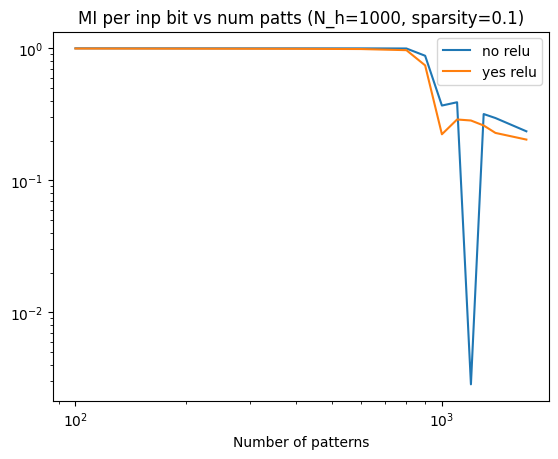

In [4]:


for i, relus in enumerate(relu):
        normlizd_l1 = err_s_l1_results[i]
        m = 1 - (2 * normlizd_l1)
        a = (1 + m) / 2
        b = (1 - m) / 2
        a = torch.abs(torch.tensor(a))
        b = torch.abs(torch.tensor(b)).cpu()
        S = -a * np.log2(a) - b * np.log2(b)
        S = np.where(m == 1, np.zeros_like(S), S)
        MI = 1 - S

        label = "yes relu" if relus else "no relu"
        plt.plot(Npatts_list,MI, label=label)
x = np.arange(len(Npatts_list))
plt.xticks(x, Npatts_list)
plt.xlabel("Number of patterns")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.title(
    f"MI per inp bit vs num patts (N_h=1000, sparsity=0.1)"
)
